In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
!ls neiss

2017-NEISS-Data-Highlights.pdf
2018-NEISS-Comparability-Table.pdf
2018-NEISS-CPSC-only-Coding-Manual.pdf
neiss_fmt.txt
neiss2017.tsv
neiss-soma.ipynb


In [3]:
#  Commnd line code to preview the first few lines of any doc = head
!head -n 5 neiss/neiss2017.tsv

"CPSC_Case_Number"	"Treatment_Date"	"Age"	"Sex"	"Race"	"Other_Race"	"Body_Part"	"Diagnosis"	"Other_Diagnosis"	"Disposition"	"Location"	"Fire_Involvement"	"Product_1"	"Product_2"	"Narrative_1"	"Narrative_2"	"Stratum"	"PSU"	"Weight"
170100733	01/01/2017	21	1	1		75	62		1	1	0	1207	0	21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE	. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION	S	46	77.6641
170100734	01/01/2017	71	1	1		31	53		1	5	0	1807	0	71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION		S	46	77.6641
170100735	01/01/2017	16	1	1		33	51		1	1	0	676	342	16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE	DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM	S	46	77.6641
170100737	01/01/2017	55	2	1		75	62		1	1	0	620	0	55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED	HEAD INJURY	S	46	77.6641


In [4]:
#  .tsv is a tab-separated value, so use csv reader but with condition of seperators defined as tabs.
#  Also, this US Gov data and not set to Unicode. IF not Unicode, most US data is set to Latin-1 (ISO/IEC 8859-1).
df = pd.read_csv("neiss/neiss2017.tsv", sep='\t', encoding='latin-1')

C:\Program Files (x86)\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(386907, 19)

In [6]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [7]:
# df.head()

In [8]:
# df.tail()

In [9]:
df['Sex'].value_counts()

1    208695
2    178203
0         8
8         1
Name: Sex, dtype: int64

In [10]:
#  replace numbers with names using a dictionary
df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: 'Not Recorded'
})

#To make it permanent, we rewrite the whole 'Sex' data column
df['Sex'] = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: 'Not Recorded'
})

In [11]:
df['Sex'].value_counts()

Male            208695
Female          178203
Not Recorded         8
8                    1
Name: Sex, dtype: int64

In [12]:
# show just the weird row with Sex = 8 and investigate
df[df.Sex == 8]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# That's dirty data.  lots of missing useful & important data.  This should probably be deleted.

In [14]:
#  Find missing data with isna or isnull()
df[df.Diagnosis.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#  Permanently remove empty rows from the whole data set using dropna or dropnull
df = df.dropna(subset=['Diagnosis'])

In [16]:
#  Double check for mssing data / nulls with another isna or isnull()
df[df.Diagnosis.isna()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


In [17]:
#  We check the list again for the problem row Sex = "8" and it's gone.
df['Sex'].value_counts()

Male            208695
Female          178203
Not Recorded         8
Name: Sex, dtype: int64

## missing age stuff
# turn to int
# clean up baby notes or delete
# histograms with overlaps and cleanup

In [ ]:
###### FAILING AT THIS
###### Organize by age 
###### 
df.Age

In [18]:
# Organize by number of injuries per age
df.Age.value_counts()

2      12099
3      10036
13      9140
14      9057
12      8666
15      8520
4       8447
11      8339
10      8042
16      7823
5       7583
9       7489
6       7265
8       7039
17      6908
7       6831
18      5117
19      4466
20      4202
21      4019
27      3673
22      3658
24      3633
25      3586
23      3576
26      3544
28      3508
29      3404
31      3307
32      3255
       ...  
211       66
94        65
101       62
93        62
201       54
102       51
95        45
205       45
204       42
203       36
96        27
103       26
202       25
97        22
104       18
98        17
0         16
105        9
100        9
99         8
101        6
106        5
102        4
0          4
109        2
105        2
113        1
111        1
108        1
103        1
Name: Age, Length: 260, dtype: int64

In [21]:
# Can't do this yet!  There is no longer a value of 'C' in the Ages but it still won't process.  
# df.Age.min()

# It's because Age is listed as an 'object' aka a 'string' in Panda-speak, and that can't be min'ed or max'ed, etc.
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                  object
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [22]:
# Permenantly change the whole Age column into integer 
df.Age = df.Age.astype(int)

In [23]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                   int32
Sex                  object
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

In [24]:
df.Age.min()

0

In [25]:
df[df.Age == 2]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
28,170102926,01/01/2017,2,Male,0.0,NaN,30.0,53.0,NaN,1.0,1.0,0.0,4076.0,0.0,2YOM CONT SHLDR- FELL BED,NaN,M,14.0,87.0904
101,170105442,01/02/2017,2,Male,4.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,649.0,0.0,A 2YOM SLIPPED AND FELL WHILE STANDING ON TOIL...,EAD INJURY,V,25.0,16.1828
109,170106085,01/01/2017,2,Female,2.0,NaN,85.0,68.0,NaN,5.0,1.0,0.0,1931.0,1915.0,2 YOF INGESTED SOME OF MOMS PILLS - POSSIBLY *...,ATE. DX POISONING,C,31.0,4.7570
114,170106097,01/01/2017,2,Female,2.0,NaN,77.0,53.0,NaN,1.0,0.0,0.0,1395.0,0.0,2 YOF PULLING A TOY FROM SISTER AND HIT SELF ...,BRASION,C,31.0,4.7570
119,170106105,01/01/2017,2,Male,2.0,NaN,76.0,59.0,NaN,1.0,0.0,0.0,1344.0,0.0,2 YOM HIT IN THE FACE WITH A TOY GUITAR THAT B...,D. DX FACE LACERATION,C,31.0,4.7570
131,170106123,01/01/2017,2,Female,2.0,NaN,88.0,59.0,NaN,1.0,0.0,0.0,1893.0,0.0,"2 YOF DANCING AROUND AND FELL, HIT MOUTH ON DO...",NaN,C,31.0,4.7570
150,170106220,01/01/2017,2,Male,4.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1807.0,0.0,"2YOM WITH CHI, FELL OUT OF DAD'S ARMS ONTO FLOOR",NaN,V,61.0,16.1828
180,170106726,01/01/2017,2,Female,3.0,HISPANIC,76.0,59.0,NaN,1.0,1.0,0.0,4057.0,0.0,2YOF-PT FELL HITTING FOREHEAD ONTO THE TABLE P...,FOREHEAD. DX- 0.5CM FOREHEAD LACERATION.,C,90.0,4.7570
190,170106888,01/02/2017,2,Male,2.0,NaN,76.0,59.0,NaN,1.0,0.0,0.0,4057.0,1205.0,2YOM WAS PLAYING BASKETBALL WHEN HE HIT HIS FA...,EYEBROW AND LOWER LIP LACERATIONS,C,8.0,4.7570
243,170107120,01/02/2017,2,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,4076.0,4057.0,CHI. 2 YOF FELL OFF OF A BED AND INTO A NIGHTS...,NaN,V,95.0,16.1828


In [26]:
df[df.Age == 1]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


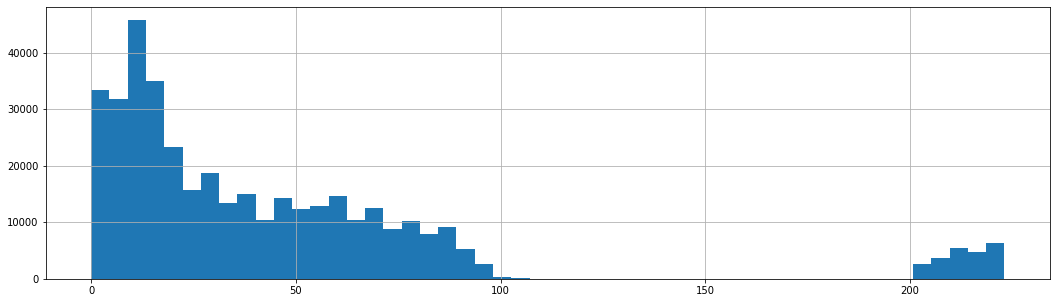

In [27]:
# Looking at the documentation
#     Age  0    =  Not Recorded
#     Ages 200+ =  Babies where the 200 is meaningless but the last two digits count months
df.Age.hist(bins=50, figsize=(18,5))

In [28]:
# Count up all of the times age is greater than 200
# False = 0     True = 1
# So you can do .sum() to collect and add up all of the 1's
(df.Age >= 200).sum()

22818

In [ ]:
# Solution 1:  remove all babies from the data (anyone with age 200+)
# df = df[df.Age < 200]

In [39]:
# Solution 2:  convert 200+ ages to useful ages (most likely floats, but maybe ints in pinch)

# Could define the equation:
# age_equ = '(df.Age - 200) / 12'

# Here' switch to floats
df.Age = df.Age.astype(float)
df['Age_Deci'] = df.Age.mask(df.Age >= 200, (df.Age - 200) / 12)

In [41]:
df[df.Age_Deci < 2]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,Age_Deci
72,170104133,01/01/2017,212.0,Male,0.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,671.0,0.0,12 MONTH OLD MALE CLIMBED UP ONTO ROCKING CHAR...,TH CLOSED HEAD INJ,V,38.0,16.1828,1.000000
116,170106101,01/01/2017,208.0,Female,3.0,UNKNOWN,75.0,53.0,NaN,1.0,1.0,0.0,4076.0,1807.0,8 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570,0.666667
125,170106113,01/01/2017,218.0,Female,1.0,NaN,83.0,57.0,NaN,1.0,1.0,0.0,1545.0,0.0,18 MOF FELL FROM CRIB. DX FOOT FX,NaN,C,31.0,4.7570,1.500000
126,170106117,01/01/2017,218.0,Male,1.0,NaN,32.0,55.0,NaN,1.0,5.0,0.0,1645.0,0.0,18 MOM - PT EATING SPAGHETTI AT A RESTAURANT A...,VE AND HEARD A POP. DX NURSEMAIDS ELBOW,C,31.0,4.7570,1.500000
129,170106120,01/01/2017,204.0,Female,3.0,HISPANIC,75.0,53.0,NaN,1.0,1.0,0.0,4076.0,1807.0,4 MOF FELL OFF BED TO FLOOR. DX SCALP CONTUSION,NaN,C,31.0,4.7570,0.333333
132,170106125,01/01/2017,212.0,Male,2.0,NaN,88.0,60.0,NaN,1.0,0.0,0.0,474.0,0.0,12 MOM - PT WALKING AROUND WITH A *** IN MOUTH...,UMA,C,31.0,4.7570,1.000000
142,170106153,01/02/2017,219.0,Male,1.0,NaN,75.0,53.0,NaN,1.0,1.0,0.0,604.0,0.0,19 MONTH OLD MALE FELL AND HIT HEAD ON DRESSSE...,NaN,S,72.0,77.6641,1.583333
184,170106738,01/01/2017,210.0,Male,1.0,NaN,88.0,59.0,NaN,1.0,1.0,0.0,679.0,0.0,10MOM-PT FELL FROM THE COUCH @ HOME HITTING HE...,COUCH. INJURY TO LIP. DX- UPPER INNER LIP LACE...,C,90.0,4.7570,0.833333
185,170106880,01/02/2017,208.0,Male,3.0,HISPANIC,75.0,52.0,NaN,1.0,0.0,0.0,1807.0,0.0,8MOM PULLED HIMSELF UP THEN FELL BACKWARDS HIT...,"FLOOR, THEN HE BEGAN VOMITING; CONCUSSION",C,8.0,4.7570,0.666667
187,170106883,01/02/2017,214.0,Male,2.0,NaN,75.0,59.0,NaN,1.0,0.0,0.0,4056.0,0.0,14MOM FELL AND HIT THE BACK OF HIS HEAD ON THE...,"ENTERTAINMENT CENTER; SCALP LACERATION, MINOR ...",C,8.0,4.7570,1.166667


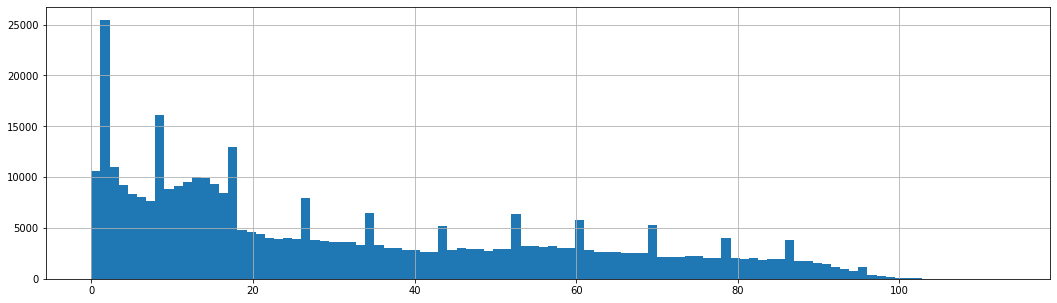

In [43]:
df.Age_Deci.hist(bins=100, figsize=(18,5))

In [ ]:
# Permenantly change Age into an integer 
df.age = df.Age.astype(float)
# That works with age if missing data is '0'
# But! if missing data as NaN this won't work
# Floats can have missing data as NaN
df.age = df.Age.astype(float)

In [ ]:
df.Race.value_counts()

In [ ]:
# Replace Race Numbers with Words
df['Race'] = df.Race.replace({
    1: 'White',
    2: 'Black',
    4: 'Asian',
    5: 'American Indian',
    6: 'Pacific Islander',
    3: 'Other',
    0: 'Not Stated'
})

In [ ]:
df.Race.value_counts()

In [ ]:
df.Race.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(14,7))

In [ ]:
# That's a lot of Not Stated.
# When this is imported as a csv, you can state a lot of stuff to be mising data: 
#        "NA", "N/A", "UNKNOWN", "UNKN", 
# For this doc '0' is the value for missing race (maybe some other fields?)
# df = pd.read_csv("neiss/neiss2017.tsv", sep='\t', encoding='latin-1', na_values="0")

In [ ]:
df.Other_Race.value_counts()

In [ ]:
# Can Also do replaces after the import stage
import numpy as np

df = df.Other_Race.replace(["NS", "UNKN"], np.nan)

In [ ]:
# "45.4%" will require removing %, replacing it with nothing.
.unique